# Prediction of Tennis Match Results Using Classification Model with K-Nearest Neighbours Algorithm

## Introduction

Our project will answer the predictive question of whether a professional tennis player will win or lose the match. The dataset used to answer the question contains 6867 rows of data from the results of all tennis games for top 500 players from 2017 to 2019. From this dataset, we can determine the tournament’s name, level and date, and also the winners and losers respective age, country, score, serve points, break points, rank, and rank points. By analyzing certain aspects of the data collected from every match, we can find out the relationship between the player’s qualities and the chance of winning. For the age of players, it’s collected at the time the player in the match and marked in decimals. While for the rank, it is the player’s ATP or WTA rank as of the tournament date. However, there are some matches with missing stats, as some of them aren’t recorded, while others were deleted because they didn’t pass the sanity check.

## Preliminary exploratory data analysis

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [3]:
set.seed(123)

# Reading and Wrangling Data

atp_data <- read_csv("atp2017-2019.csv") |>
  select(winner_age, loser_age, winner_rank, loser_rank, w_1stWon, l_1stWon) |>
  na.omit()

win <- rep(c("winner"), times = nrow(atp_data))
atp_data_win <- cbind(atp_data, win) |>
  select(win, winner_age, winner_rank, w_1stWon)
colnames(atp_data_win) <- c("result", "age","rank", "first_svpt_won")

lose <- rep(c("loser"), times = nrow(atp_data))
atp_data_lose <- cbind(atp_data, lose) |>
  select(lose, loser_age, loser_rank, l_1stWon)
colnames(atp_data_lose) <- c("result", "age","rank", "first_svpt_won")

data <- rbind(atp_data_win, atp_data_lose) |>
  mutate(result = as_factor(result))

# Splitting Dataset

data_split <- initial_split(data, prop = 0.75, strata = result)  
atp_train <- training(data_split)   
atp_test <- testing(data_split)

atp_train
atp_test  

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


,result,age,rank,first_svpt_won
,<fct>,<dbl>,<dbl>,<dbl>
6771,loser,22.88569,16,34
6772,loser,33.70568,239,36
6775,loser,28.01095,18,46
6776,loser,26.40383,185,40
6779,loser,24.69815,72,30
6783,loser,23.97810,14,35
6786,loser,22.72416,146,34
6787,loser,25.98494,154,17
6788,loser,19.40589,147,18


,result,age,rank,first_svpt_won
,<fct>,<dbl>,<dbl>,<dbl>
4,winner,33.70568,239,34
8,winner,33.70568,239,30
17,winner,24.69815,72,23
22,winner,23.67967,35,63
23,winner,31.88227,40,40
28,winner,30.71321,24,52
29,winner,31.61123,1,41
32,winner,26.85284,21,31
34,winner,28.50376,48,48


In [6]:
# Summary Tables for Our Dataset

num_obs <- nrow(atp_train)

atp_train_results <- atp_train |>
                     group_by(result) |>
                     summarize(count = n(), percentage = n()/num_obs * 100)


atp_train_averages <- atp_train |>
                      mutate(average_age = mean(age)) |>
                      mutate(average_rank = mean(rank)) |>
                      mutate(average_first_svpt_won = mean(first_svpt_won)) |>
                      select(average_age, average_rank, average_first_svpt_won) |>
                      slice(1)

atp_train_missing_rows <- data.frame(missing_rows = sum(is.na(atp_train)))


atp_train_results 

atp_train_averages

atp_train_missing_rows


result,count,percentage
<fct>,<int>,<dbl>
winner,5077,50
loser,5077,50


average_age,average_rank,average_first_svpt_won
<dbl>,<dbl>,<dbl>
27.53868,70.4093,35.9159


missing_rows
<int>
0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



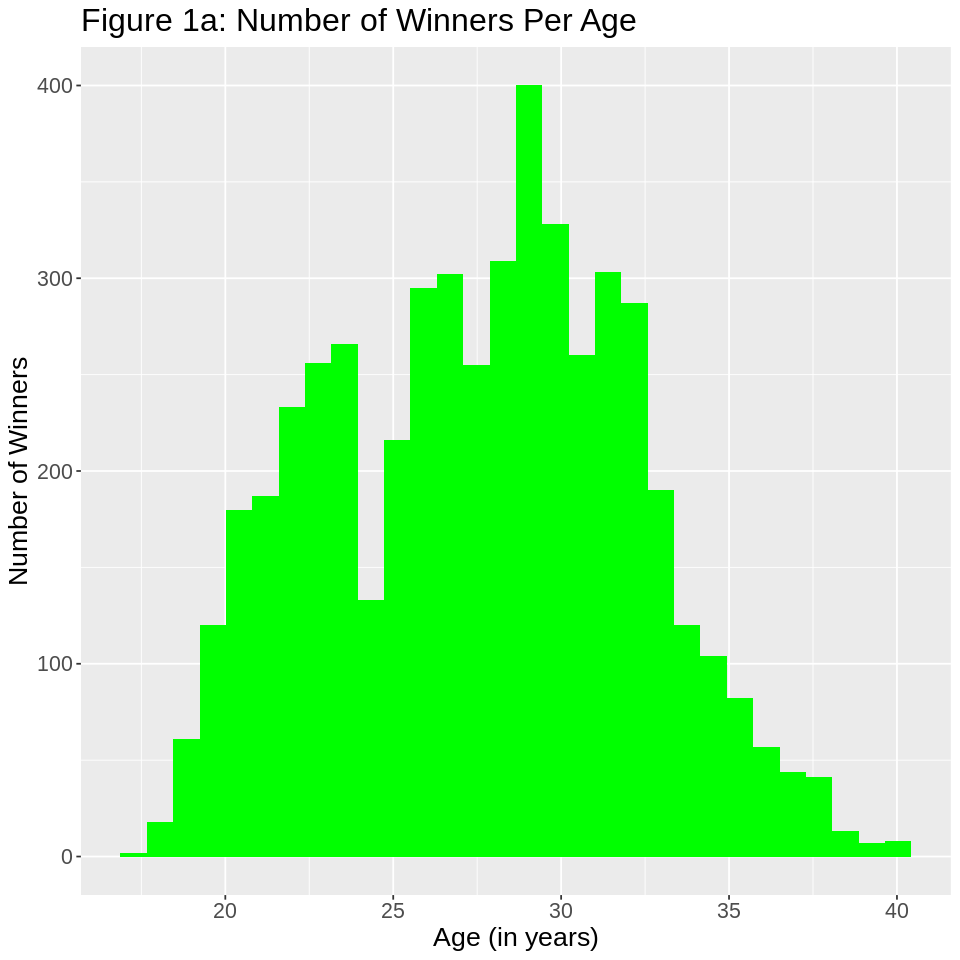

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 154 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


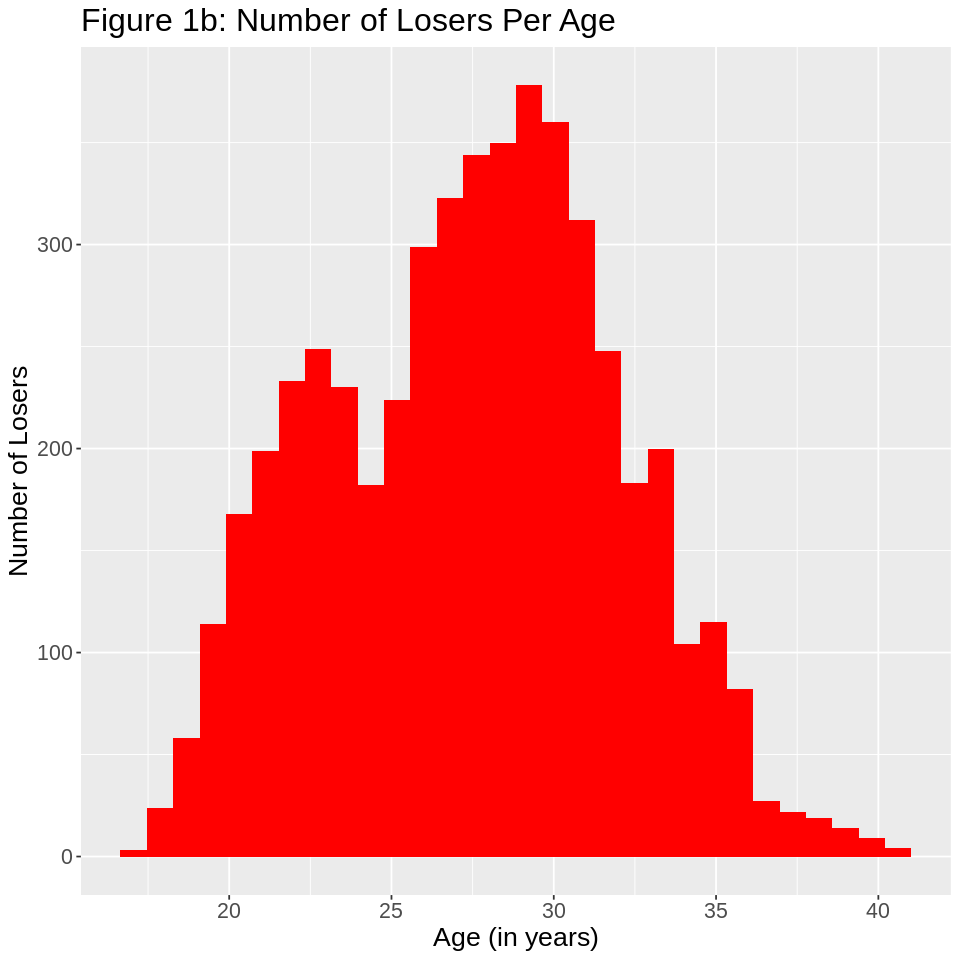

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 330 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


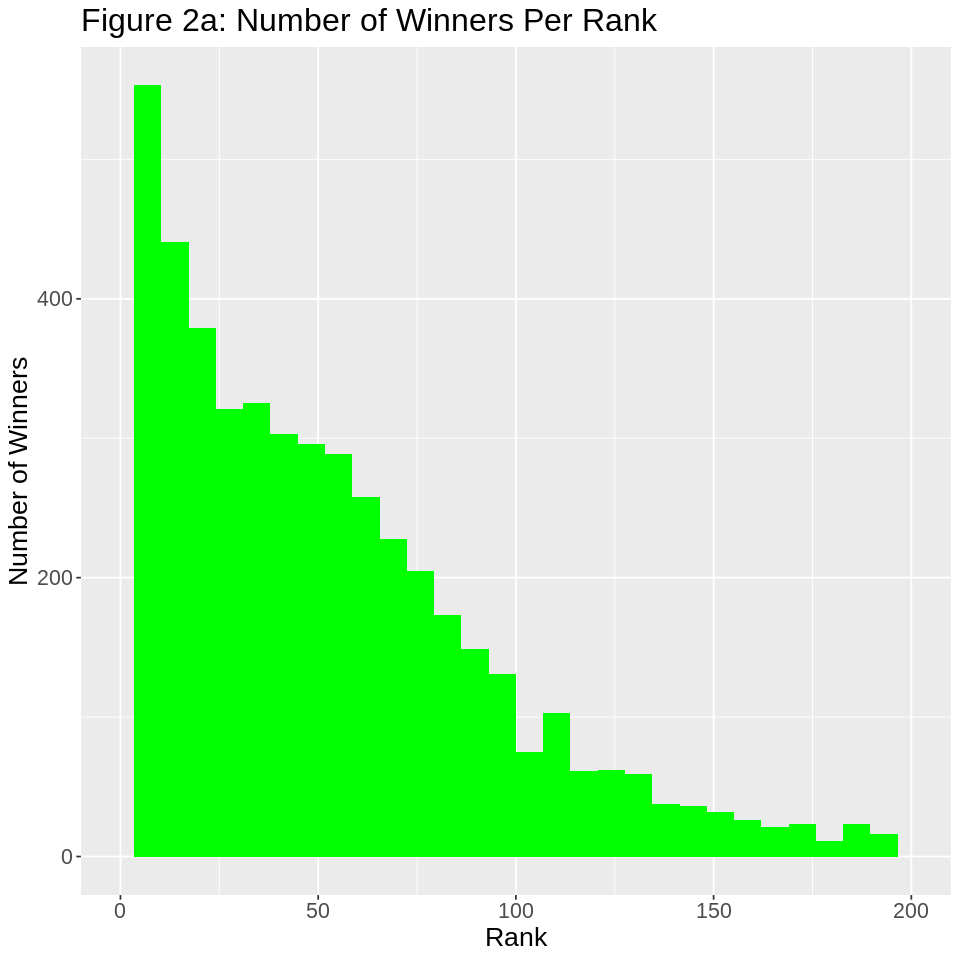

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 8 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


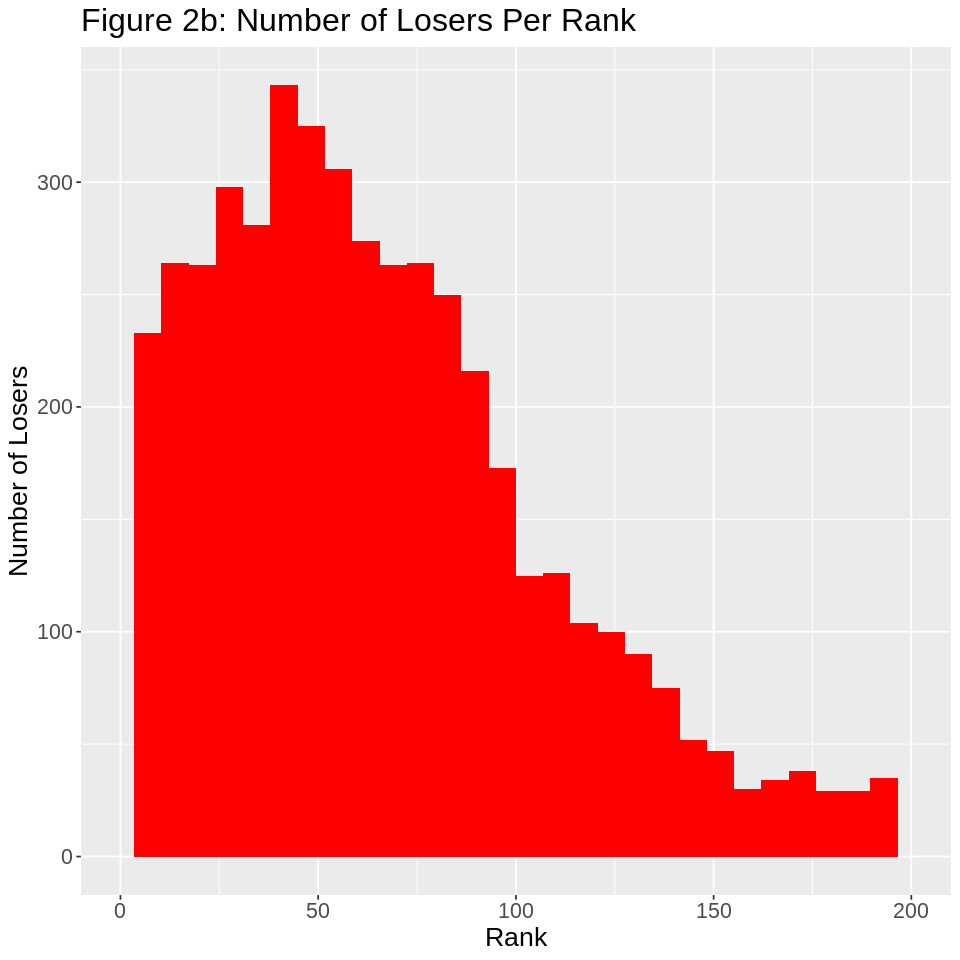

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


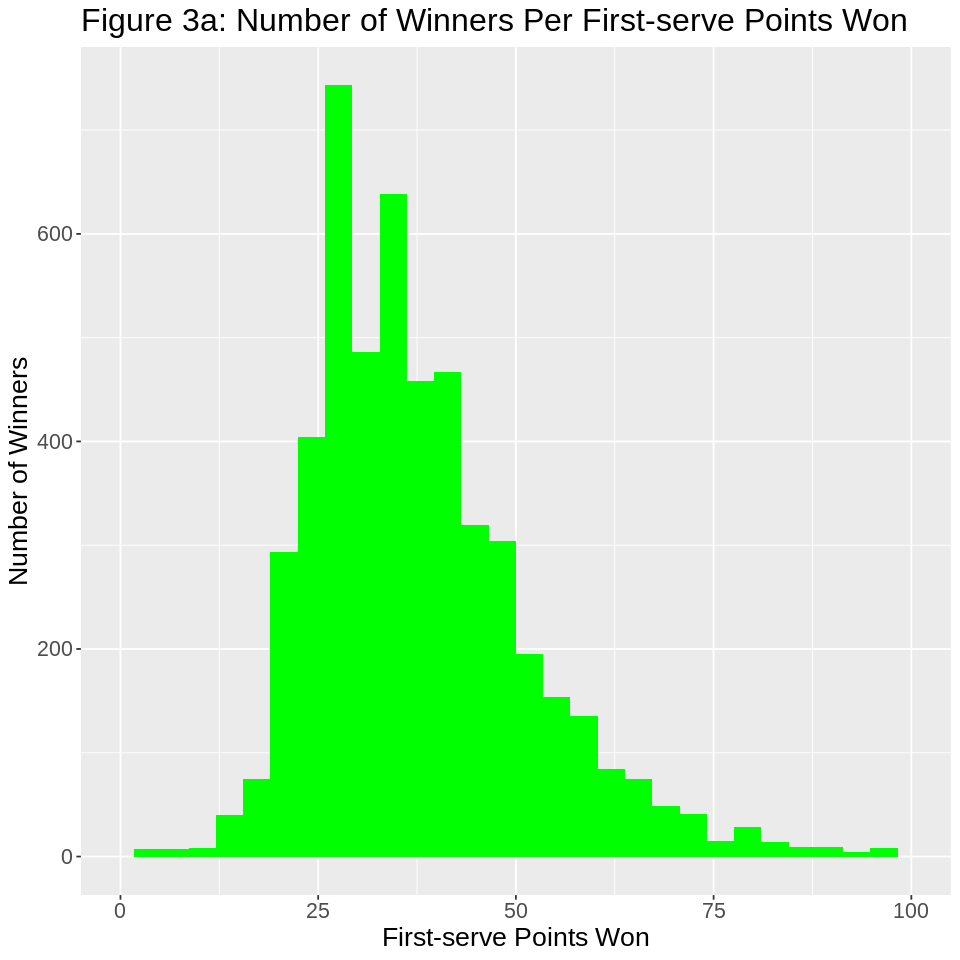

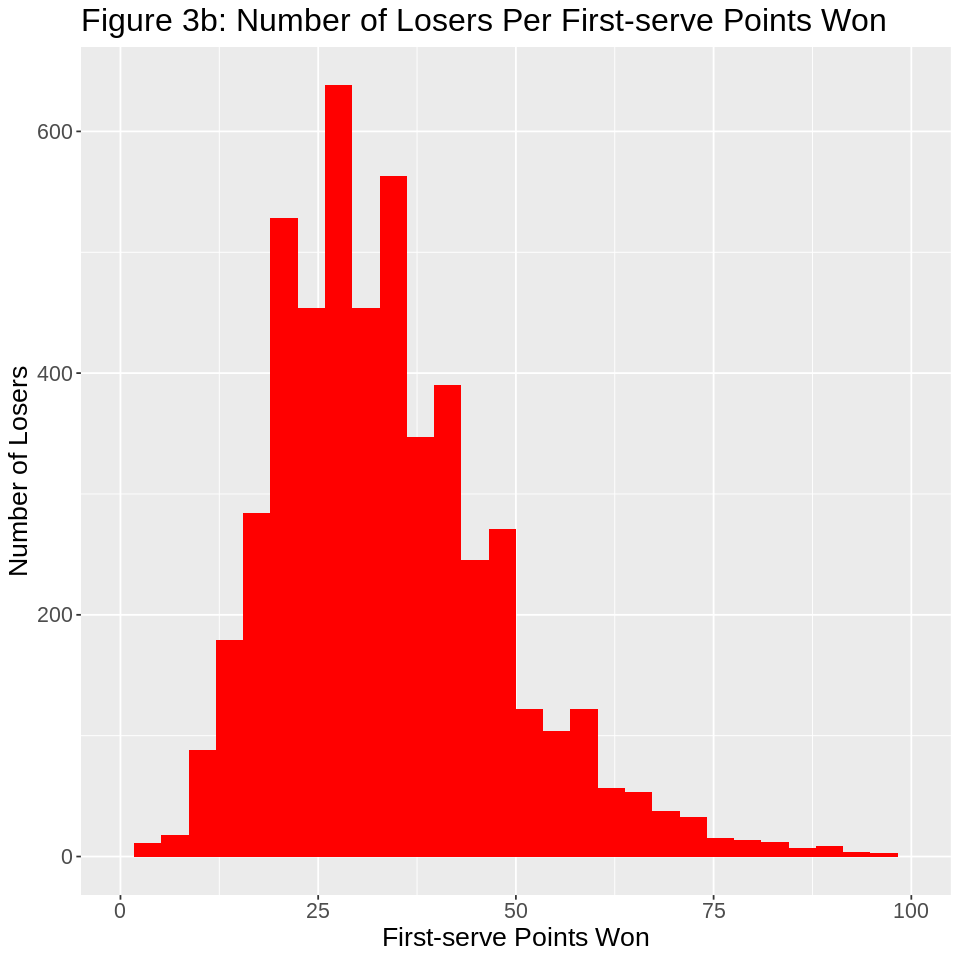

In [5]:
# Visualization of dataset - Code
options(repr.plot.height = 8, repr.plot.width = 8)

# Predictor 1 (Age) vs Result

atp_train_winners <- filter(atp_train, result == "winner")

winners_per_age <- ggplot(atp_train_winners, aes(x = age)) +
                   geom_histogram(fill = "green") +
                   labs(x = "Age (in years)", y = "Number of Winners") +
                   ggtitle("Figure 1a: Number of Winners Per Age") +
                   theme(text = element_text(size = 16))
                   
winners_per_age

atp_train_losers <- filter(atp_train, result == "loser")


losers_per_age <-  ggplot(atp_train_losers, aes(x = age)) +
                   geom_histogram(fill = "red") +
                   labs(x = "Age (in years)", y = "Number of Losers") +
                   ggtitle("Figure 1b: Number of Losers Per Age") +
                   theme(text = element_text(size = 16))

losers_per_age


# Predictor 2 (Rank) vs Result

winners_per_rank <- ggplot(atp_train_winners, aes(x = rank)) +
                   geom_histogram(fill = "green") +
                   labs(x = "Rank", y = "Number of Winners") +
                   xlim(0,200) +
                   ggtitle("Figure 2a: Number of Winners Per Rank") +
                   theme(text = element_text(size = 16))
                   
winners_per_rank


losers_per_age <-  ggplot(atp_train_losers, aes(x = rank)) +
                   geom_histogram(fill = "red") +
                   labs(x = "Rank", y = "Number of Losers") +
                   xlim(0,200) +
                   ggtitle("Figure 2b: Number of Losers Per Rank") +
                   theme(text = element_text(size = 16))               

losers_per_age


# Predictor 3 (First-serve points Won) vs Result

winners_per_1stwon <- ggplot(atp_train_winners, aes(x = first_svpt_won)) +
                   geom_histogram(fill = "green") +
                   labs(x = "First-serve Points Won", y = "Number of Winners") +
                   xlim(0,100) +
                   ggtitle("Figure 3a: Number of Winners Per First-serve Points Won") +
                   theme(text = element_text(size = 16))

winners_per_1stwon


losers_per_1stwon <- ggplot(atp_train_losers, aes(x = first_svpt_won)) +
                   geom_histogram(fill = "red") +
                   labs(x = "First-serve Points Won", y = "Number of Losers") +
                   xlim(0,100) +
                   ggtitle("Figure 3b: Number of Losers Per First-serve Points Won") +
                   theme(text = element_text(size = 16))

losers_per_1stwon


## Methods
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

## Expected outcomes and significance

We expect to find that higher ranking and higher first-serve points will increase the tennis player’s chance of winning the match.
As professional tournament circuits are still expanding, along with many notable and rising players and rivalries in this field, it broadened the appeal of tennis among the public. With statistical analysis for forecasting tennis games, coaches, media and even stakeholders in the betting market are benefitted. For instance, the winning probability of a player calculated by this model can determine whether or not to place a bet, their data can be used for coaches to evaluate a player's performance, and media channels provide more insightful coverage of a sporting tournament. 
After analysing the data of the top 500 tennis players in the world, we can further explore whether or not a specific tennis stroke or a strategy is working, then the results may lead to questions about whether the precision of a forehand stroke is higher than a backhand stroke, or which type of training is required to equip a player. These data may help develop a player’s skills and foster their growth with a suitable approach.
